### Regression using Legendre Polynomials
- Legendre polynomials are orthogonal polynomials in the interval of -1 to +1. A Legendre polynomial of p-th order is denoted as $L_p(x)$. The first few Legendre polynomial are given below.

$$
L_0(x) = 1,\\
L_1(x) = x,\\
L_2(x) = \frac{1}{2}(3x^2-1),\\
L_3(x) = \frac{1}{2}(5x^3-3x)\\
$$

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/iksinc/ML-Stuff/LegendreRegression.ipynb)


In [5]:
# Let's first make a plot of these polynomials. We will use scipy for evaluating the Legendre polynomials
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import eval_legendre as Lp

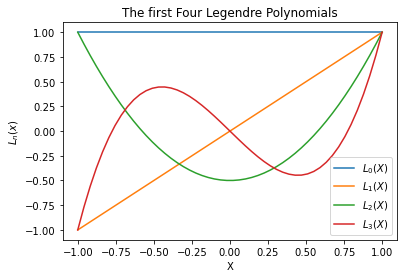

In [17]:
X = np.linspace(-1, 1, 50)# Generate 50 points in the interval [-1 1]
plt.plot(X,Lp(0,X), label=r'$L_0(X)$')
plt.plot(X,Lp(1,X), label=r'$L_1(X)$')
plt.plot(X,Lp(2,X), label=r'$L_2(X)$')
plt.plot(X,Lp(3,X),label=r'$L_3(X)$')
plt.title('The first Four Legendre Polynomials')
plt.xlabel("X")
plt.ylabel(r'$L_n(x)$')
plt.legend(loc='lower right')
plt.show()

In [19]:
# We will now show orthogonality. For this, let us multiply a pair of Legendre functions of different order and
# sum over the interval [-1 1], the Legendre polynomial domain
s_diff = np.sum(Lp(2,X)*Lp(3,X))
s_same = np.sum(Lp(2,X)*Lp(2,X))
print(s_diff, s_same)# s_diff should be zero and s-same should be not zero.

-1.7763568394002505e-15 10.840806126698904


In [21]:
# We will now generate and plot data for use in regression.
a = np.array([-0.01, 0.1, 1.2, 0.5])
y = a[0]+a[1]*np.sin(X)*np.cos(X)+a[2]*Lp(2,X)+a[3]*Lp(3,X)+0.2*np.random.randn(50)

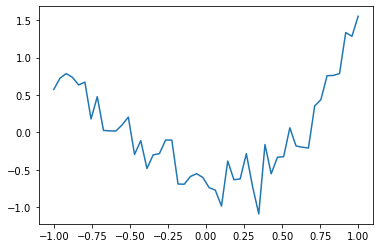

In [22]:
plt.plot(X,y)
plt.show()

### We are going to use the following model for predicting y
$$
\hat{y} = w_0 * L_0(X)+w_1*L_1(X)+w_2*L_2(X)+w_3*L_3(X)
$$
where $w_0, w_1, w_2,$ and $w_3$ are the model parameters.

In [37]:
# Let's create the predictor matrix, XX
XX = np.column_stack((Lp(0,X), Lp(1,X),Lp(2,X),Lp(3,X)))

In [38]:
# We will first use least square fitting from Scipy
theta = np.linalg.lstsq(XX,y,rcond=None)[0]

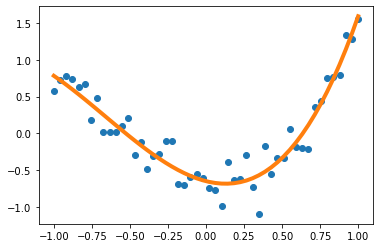

In [39]:
# Let's get the predictions
y_hat = theta[0]*Lp(0,X)+theta[1]*Lp(1,X)+theta[2]*Lp(2,X)+theta[3]*Lp(3,X)
plt.plot(X,y, 'o', markersize=6)
plt.plot(X,y_hat, linewidth=4)
plt.show()

In [40]:
print(theta)

[-0.03533928  0.03415949  1.22206278  0.36950276]


In [41]:
# Calculate the coefficient of determination
SSR = np.sum((y_hat-np.mean(y))**2)
SST = np.sum((y-np.mean(y))**2)
R_square = SSR/SST
print(R_square)

0.9045105340691546


In [32]:
# Let's compare it with ordinary polynomial fitting
XX = np.column_stack((np.ones(50),X, X**2,X**3))

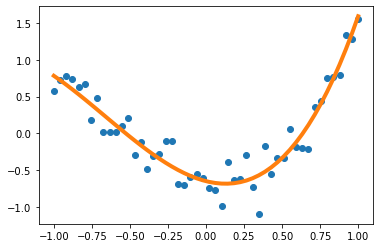

In [33]:
theta = np.linalg.lstsq(XX,y,rcond=None)[0]
y_hat = theta[0]*np.ones(50)+theta[1]*X+theta[2]*X**2+theta[3]*X**3
plt.plot(X,y, 'o', markersize=6)
plt.plot(X,y_hat, linewidth=4)
plt.show()

In [34]:
print(theta)

[-0.64637067 -0.52009465  1.83309418  0.9237569 ]


In [36]:
# Calculate the coefficient of determination
SSR = np.sum((y_hat-np.mean(y))**2)
SST = np.sum((y-np.mean(y))**2)
R_square = SSR/SST
print(R_square)

0.9045105340691533


#### The results are identical. The issue with ordinary polynomial regression is that with higher order polynomials
#### fitting becomes difficult and the noise has a significant impact